# Metropolis Hastings

The Metropolis–Hastings algorithm is a Markov chain Monte Carlo (MCMC) method for obtaining a sequence of random samples from a probability distribution for which direct sampling is difficult. 

In [27]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import scipy as sp
import scipy.io as sio

plt.rcParams['font.family'] = 'Fira Sans'
plt.rcParams['figure.figsize'] = (16.0, 8.0)

In [28]:
data = sp.io.loadmat('./binaryclass2.mat')
X = data['X']
t = data['t']

In [29]:
def laplacecomp(w, X, t):
    """Computes g and log g for the Laplace model introduced in the lecture."""
    ss = 10 # Prior variance
    # Evaluate log prior
    logg = -(1 / (2 * ss)) * np.dot(w.T, w)
    # Compute P
    P = 1 / (1 + np.exp(-X.dot(w)))
    logl = sum(t * np.log(P) + (1 - t) * np.log(1 - P))
    logg = logg + logl
    g = np.exp(logg)
    return g, logg

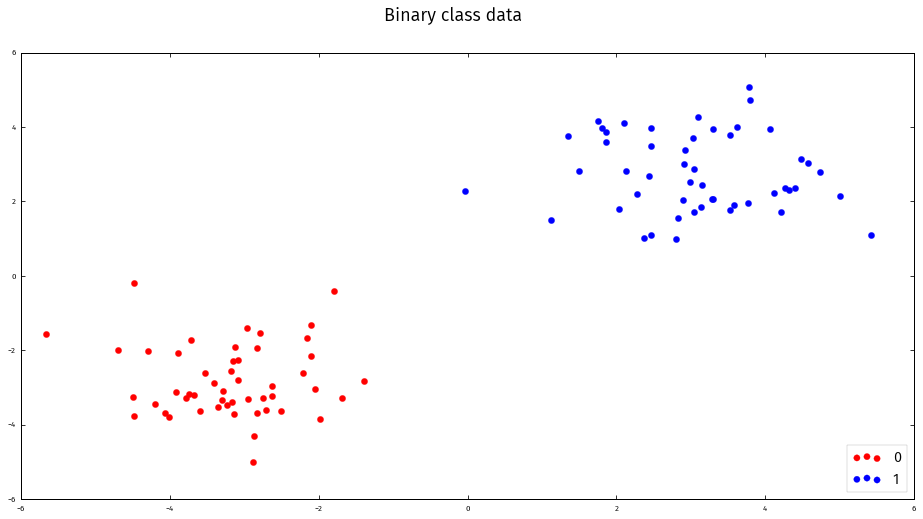

In [62]:
fig, ax = plt.subplots()
fig.suptitle('Binary class data', fontsize=18)

for clss in np.unique(t):
    points = np.array([point for i, point in enumerate(X) if t[i] == clss])
    ax.scatter(points[:,0], points[:,1], label=clss, s=40, color=('red' if clss == 0 else 'blue'))

ax.legend(loc='lower right', fontsize='x-large', framealpha=0.5)
ax.axis((-6, 6, -6, 6))

plt.show()

In [31]:
g, logg = laplacecomp(np.random.randn(2, 1), X, t)
print('g:\t', g)
print('logg:\t', logg)

g:	 [[ 0.0023085]]
logg:	 [[-6.07115646]]


In [58]:
# Metropolis-Hastings
w = np.random.randn(2, 1)
g, logg = laplacecomp(w, X, t)

ws = [w, ]

for s in np.arange(10000):
    wp = np.random.randn(2, 1) * 0.5 + w
    gp, loggp = laplacecomp(wp, X, t)
    r = gp / g
    if r >= 1:
        w, g, logg = wp, gp, loggp
        ws.append(w)
    else:
        u = np.random.uniform()
        if u <= r:
            # Accept move
            w, g, logg = wp, gp, loggp
            ws.append(w)

/home/random/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/home/random/.local/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


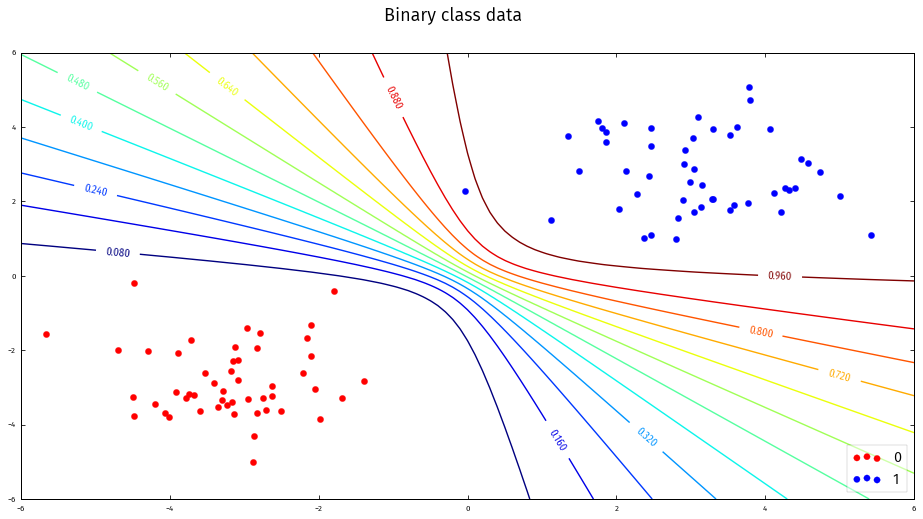

In [61]:
fig, ax = plt.subplots()
fig.suptitle('Binary class data', fontsize=18)

x = np.arange(-6.0, 6.1, 0.1)
y = np.arange(-6.0, 6.1, 0.1)
xx, yy = np.meshgrid(x, y)
Z = np.zeros(shape=(len(x), len(y)))
W = np.array(ws).flatten().reshape(len(ws), 2)

for i in range(len(x)):
    for j in range(len(y)):
        x_new = np.array([x[i], y[j]])
        Z[i][j] = (1 / (1 + np.exp(-W.dot(x_new)))).mean()

for clss in np.unique(t):
    points = np.array([point for i, point in enumerate(X) if t[i] == clss])
    ax.scatter(points[:,0], points[:,1], label=clss, s=40, color=('red' if clss == 0 else 'blue'))

# Plot contour of the probabilities
cnt = ax.contour(xx, yy, Z, 12)
ax.clabel(cnt, inline=1, fontsize=10)

ax.legend(loc='lower right', fontsize='x-large', framealpha=0.5)
ax.axis((-6, 6, -6, 6))
plt.show()